In [1]:
# import numpy
import numpy as np

# import linear_model and datasets from sklearn
from sklearn import linear_model

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [2]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

* print shape of X

In [11]:
X.shape

(150, 4)

* print y

In [4]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


* create logistic regression model

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0,stratify=y)

In [94]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(multi_class='multinomial')

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [95]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 12]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

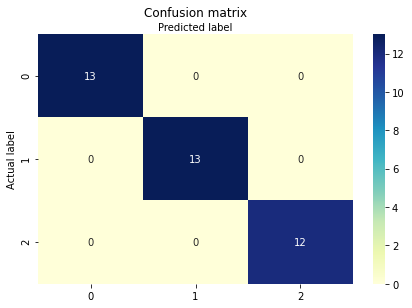

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
class_names = [0,1,2]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

* create regularization space for 'penalty' param (a.k.a. what values do we want to insert into GridSearch?)

In [58]:
penalty = ['l1', 'l2', 'elasticnet']
penalty

['l1', 'l2', 'elasticnet']

* create regularization space for 'c' param (a.k.a. what values do we want to insert into GridSearch?)

In [67]:
C = [1,10,100,100]

* create hyperparameter options dictionary

In [104]:
hyperparams = dict(penalty=penalty,C=C,multi_class=['multinomial'],max_iter=[1000])
hyperparams

{'penalty': ['l1', 'l2', 'elasticnet'],
 'C': [1, 10, 100, 100],
 'multi_class': ['multinomial'],
 'max_iter': [1000]}

* create grid search using 5-fold cross validation

In [105]:
clf = GridSearchCV(estimator=LogisticRegression(),param_grid=hyperparams,cv=5, n_jobs=-1)

* fit grid search

In [106]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 100], 'max_iter': [1000],
                         'multi_class': ['multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet']})

* take best model from grid search

In [107]:
C_best = clf.best_estimator_.C
penalty_best = clf.best_estimator_.penalty

* print best hyperparameters

In [108]:
print('Best C:',clf.best_estimator_.C) 
print('Best Penalty:',clf.best_estimator_.penalty)

Best C: 100
Best Penalty: l2


* predict target vector
    - class
    - probabilities

In [109]:
logreg = LogisticRegression(C=C_best,penalty=penalty_best,multi_class='multinomial',max_iter=1000)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

In [110]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[13,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 12]], dtype=int64)

In [117]:
y_pred_proba = logreg.predict_proba(X_test)

- plot the ROC curve and pring the AUC

AUC score: 1.0


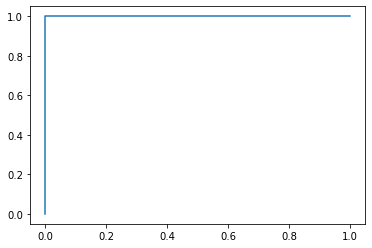

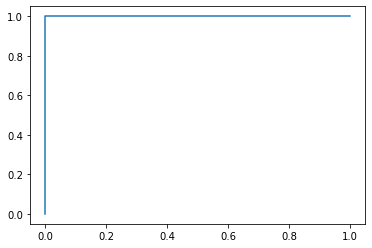

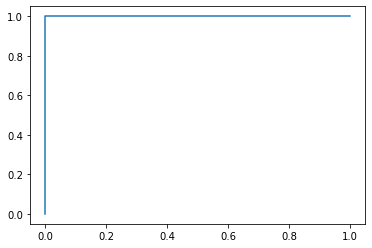

In [133]:
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred,average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test[:, i], y_pred[:, i])
    return metrics.roc_auc_score(y_test, y_pred,average=average),fpr,tpr

auc_score, fpr,tpr = multiclass_roc_auc_score(y_test,y_pred) 
print("AUC score:", auc_score)
for i in range(3):
    plt.plot(fpr[i],tpr[i])#,label='data 1, auc='+str(auc))
    plt.show()

* print Logreg coeficients

In [135]:
print(logreg.coef_)

[[-0.23934901  3.20148306 -6.08633517 -3.31629365]
 [ 1.14838816  0.53259717 -0.02307944 -4.53179034]
 [-0.90903915 -3.73408023  6.10941461  7.84808399]]


* print Logreg intercepts

In [136]:
print(logreg.intercept_)

[ 17.80215243   4.0581229  -21.86027533]
